# BIOMATH 204 Project 2

Simon Lee (simonlee711@g.ucla.edu)

## Loading and Exploring Dataset

We are using the pandas library to load a CSV file containing data on semen volume into a DataFrame.

```python
import pandas as pd

file_path = './data/svol.csv'
df = pd.read_csv(file_path)


In [1]:
import pandas as pd

file_path = './data/svol.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,age,alcohol,astn2d,htn,svol
0,21.0,0,0,0,7.56
1,25.2,0,0,0,6.27
2,25.5,0,0,0,6.67
3,28.1,0,0,0,7.28
4,32.3,0,0,0,6.62


## Summary Statistics of the Dataset

To gain insights into the numerical characteristics of the dataset, we utilize the `describe()` method of the DataFrame `df`.

```python
df.describe()


In [2]:
df.describe()

,age,alcohol,astn2d,htn,svol
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,51.851546,0.268041,0.515464,0.278351,6.100103
std,13.047486,0.445240,0.502357,0.450515,1.010851
min,12.900000,0.000000,0.000000,0.000000,3.110000
25%,44.900000,0.000000,0.000000,0.000000,5.400000
50%,52.800000,0.000000,1.000000,0.000000,6.310000
75%,59.300000,1.000000,1.000000,1.000000,6.850000
max,84.600000,1.000000,1.000000,1.000000,7.630000


## Bivariate Analysis and Statistical Testing

### 1. Comparing Mean Semen Volume Across Different Groups

We utilize various statistical methods and visualization techniques to compare the mean semen volume across different groups based on alcohol use, abstinence from sexual activity, and hypertension status.

#### 2. Alcohol Use Analysis

We first group the dataset by alcohol use and calculate descriptive statistics such as mean, median, standard deviation, and count for semen volume within each group. Additionally, we conduct a two-sample t-test to compare semen volume between individuals who use alcohol and those who do not.

#### 3. Abstinence from Sexual Activity Analysis

Similar to the alcohol use analysis, we group the dataset by abstinence from sexual activity and calculate descriptive statistics for semen volume within each group. We also perform a t-test to compare semen volume between individuals who abstain from sexual activity for 2 days or more and those who do not.

#### 4. Hypertension Analysis

We repeat the process for hypertension status, grouping the dataset accordingly and calculating descriptive statistics for semen volume within each group. A t-test is conducted to compare semen volume between individuals with and without hypertension.

### 5. Visualization: Scatter Plot of Semen Volume vs Age

We create a scatter plot to visualize the relationship between semen volume and age, with markers representing alcohol use and hypertension status. This plot helps in understanding any potential patterns or trends between semen volume and age, while also considering the influence of alcohol use and hypertension status.



             mean  median       std  count
alcohol                                   
0        6.545493   6.610  0.635729     71
1        4.883846   4.935  0.830865     26

Pvalue: 1.6529494782485866e-17
            mean  median       std  count
astn2d                                   
0       5.967234    6.25  1.021145     47
1       6.225000    6.39  0.995080     50

Pvalue: 0.21113623952052102
         mean  median       std  count
htn                                   
0    6.112000    6.29  0.983001     70
1    6.069259    6.33  1.098688     27

Pvalue: 0.8530782869104627


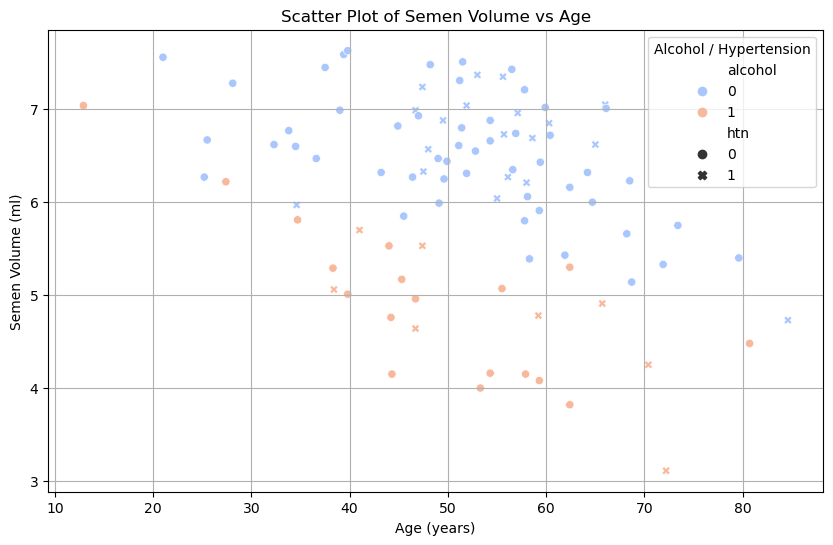

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Bivariate Analysis: Comparing mean semen volume across different groups
# Alcohol use
# Calculating medians and expanding the description for each group
grouped_alcohol = df.groupby('alcohol')['svol'].agg(['mean', 'median', 'std', 'count'])
grouped_abstinence = df.groupby('astn2d')['svol'].agg(['mean', 'median', 'std', 'count'])
grouped_hypertension = df.groupby('htn')['svol'].agg(['mean', 'median', 'std', 'count'])

# Redoing T-tests for each category to ensure completeness
# Alcohol use
t_stat_alcohol, p_val_alcohol = ttest_ind(
    df[df['alcohol'] == 1]['svol'],
    df[df['alcohol'] == 0]['svol']
)

# Abstinence
t_stat_abstinence, p_val_abstinence = ttest_ind(
    df[df['astn2d'] == 1]['svol'],
    df[df['astn2d'] == 0]['svol']
)

# Hypertension
t_stat_hypertension, p_val_hypertension = ttest_ind(
    df[df['htn'] == 1]['svol'],
    df[df['htn'] == 0]['svol']
)

# Displaying updated statistics and preparing for enhanced visualizations
print(grouped_alcohol) 
print("\nPvalue:",p_val_alcohol) 
print(grouped_abstinence) 
print("\nPvalue:",p_val_abstinence) 
print(grouped_hypertension) 
print("\nPvalue:",p_val_hypertension)

# Scatter plot of semen volume vs age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='svol', hue='alcohol', style='htn', markers=True, palette='coolwarm')
plt.title('Scatter Plot of Semen Volume vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Semen Volume (ml)')
plt.grid(True)
plt.legend(title='Alcohol / Hypertension')
plt.show()



## Detailed Visual Analysis of Semen Volume and Related Variables

We present a comprehensive visual analysis of semen volume and its relationship with various categorical and numerical variables.

### Box Plots for Semen Volume by Categorical Variables

Three box plots are displayed, each illustrating the distribution of semen volume across different categories of a predictor variable:
- **Alcohol Use**: Comparing semen volume between individuals who use alcohol (1) and those who do not (0).
- **Abstinence**: Comparing semen volume between individuals who abstain from sexual activity for 2 days or more (1) and those who do not (0).
- **Hypertension**: Comparing semen volume between individuals with hypertension (1) and those without (0).

### Histograms for Semen Volume and Age

Two histograms are presented:
- **Semen Volume**: Illustrating the distribution of semen volume across individuals, with 15 bins and a kernel density estimate (KDE).
- **Age**: Showing the distribution of age across individuals, with 15 bins and a KDE.

### Heatmap of Mean Semen Volume by Categorical Variables

A heatmap is displayed to visualize the average semen volume across different combinations of categorical variables (alcohol use, abstinence, and hypertension). The values in the heatmap represent the mean semen volume for each category combination.

This detailed visual analysis provides insights into the distribution and relationships of semen volume with various predictor variables.


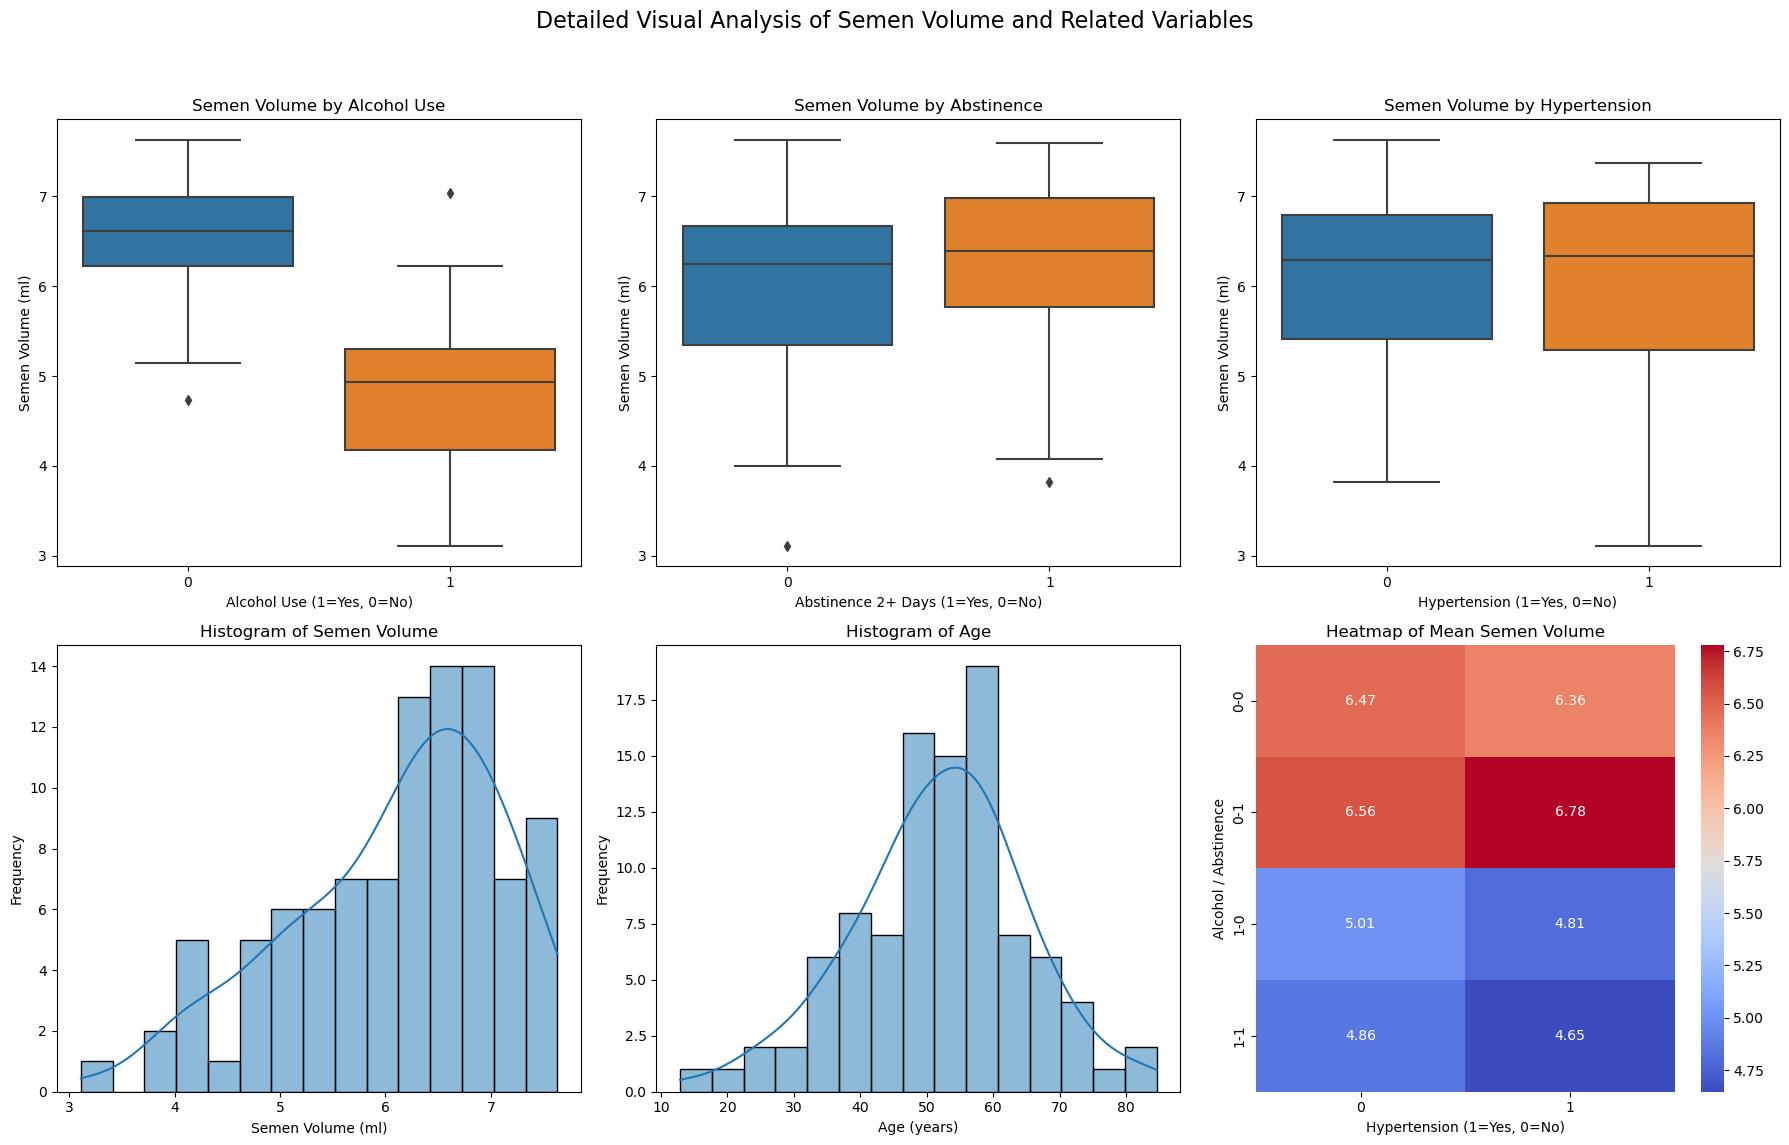

In [4]:
# Setting up the figure layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Detailed Visual Analysis of Semen Volume and Related Variables', fontsize=16)

# Box plots for semen volume by categorical variables
sns.boxplot(ax=axes[0, 0], x='alcohol', y='svol', data=df)
axes[0, 0].set_title('Semen Volume by Alcohol Use')
axes[0, 0].set_xlabel('Alcohol Use (1=Yes, 0=No)')
axes[0, 0].set_ylabel('Semen Volume (ml)')

sns.boxplot(ax=axes[0, 1], x='astn2d', y='svol', data=df)
axes[0, 1].set_title('Semen Volume by Abstinence')
axes[0, 1].set_xlabel('Abstinence 2+ Days (1=Yes, 0=No)')
axes[0, 1].set_ylabel('Semen Volume (ml)')

sns.boxplot(ax=axes[0, 2], x='htn', y='svol', data=df)
axes[0, 2].set_title('Semen Volume by Hypertension')
axes[0, 2].set_xlabel('Hypertension (1=Yes, 0=No)')
axes[0, 2].set_ylabel('Semen Volume (ml)')

# Histograms for semen volume and age
sns.histplot(ax=axes[1, 0], x='svol', bins=15, kde=True, data=df)
axes[1, 0].set_title('Histogram of Semen Volume')
axes[1, 0].set_xlabel('Semen Volume (ml)')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 1], x='age', bins=15, kde=True, data=df)
axes[1, 1].set_title('Histogram of Age')
axes[1, 1].set_xlabel('Age (years)')
axes[1, 1].set_ylabel('Frequency')

# Bar plots for average semen volume by categorical variables
mean_svol_by_group = df.groupby(['alcohol', 'astn2d', 'htn'])['svol'].mean().unstack().fillna(0)
sns.heatmap(ax=axes[1, 2], data=mean_svol_by_group, annot=True, cmap='coolwarm', fmt=".2f")
axes[1, 2].set_title('Heatmap of Mean Semen Volume')
axes[1, 2].set_xlabel('Hypertension (1=Yes, 0=No)')
axes[1, 2].set_ylabel('Alcohol / Abstinence')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()


The equation of the multivariable linear regression model fitted to the data can be expressed as:

$$ svol = \beta_0 + \beta_1 \times age + \beta_2 \times alcohol + \beta_3 \times astn2d + \beta_4 \times htn + \epsilon $$

Where:
- $ svol $ represents the semen volume in milliliters.
- $ age $ denotes the age of the individual in years.
- $ alcohol $ is a binary variable (1 for yes, 0 for no) indicating alcohol use.
- $ astn2d $ is a binary variable (1 for yes, 0 for no) indicating whether the subject abstained from sexual activity for 2 days or more.
- $ htn $ is a binary variable (1 for yes, 0 for no) indicating the presence of hypertension.
- $ \beta_0 $ is the intercept term, representing the baseline semen volume when all predictor variables are zero.
- $ \beta_1, \beta_2, \beta_3, $ and $ \beta_4 $ are the regression coefficients corresponding to age, alcohol use, abstinence from sexual activity, and hypertension status, respectively. These coefficients represent the change in semen volume associated with a one-unit increase in the corresponding predictor variable, holding all other variables constant.
- $ \epsilon $ represents the error term, capturing the variability in semen volume not explained by the predictor variables.

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit a multivariable linear regression model
model = ols('svol ~ age + alcohol + astn2d + htn', data=df).fit()

# Summary of the regression model
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   svol   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     74.51
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           5.03e-28
Time:                        15:32:30   Log-Likelihood:                -68.126
No. Observations:                  97   AIC:                             146.3
Df Residuals:                      92   BIC:                             159.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3702      0.218     38.389      0.000       7.937       8.803
age           -0.0415      0.004     -9.394      0.000      -0.050      -0.033
alcohol       -1.6948      0.116    -14.623      0.000      -1.925      -1.465
astn2d         0.5537      0.114      4.866      0.000       0.328       0.780
htn            0.1881      0.115      1.631      0.106      -0.041       0.417
==============================================================================
Omnibus:                        4.952   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                2.431
Skew:                           0.038   Prob(JB):                        0.297
Kurtosis:                       2.228   Cond. No.                         232.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In model 1, The regression model formulated for this analysis is expressed as:

$$ svol = \beta_0 + \beta_1 \cdot age + \beta_2 \cdot htn + \beta_3 \cdot (age \cdot htn) + \beta_4 \cdot alcohol + \beta_5 \cdot astn2d + \epsilon $$

where:
- $ \beta_0 $ represents the intercept, indicating the expected semen volume when all predictor variables and interaction term are zero.
- $ \beta_1 $ and $ \beta_2 $ are the coefficients associated with age and hypertension respectively, representing their individual effects on semen volume.
- $ \beta_3 $ captures the combined effect of age and hypertension, indicating whether the relationship between age and semen volume varies depending on hypertension status, or vice versa.
- $ \beta_4 $ and $ \beta_5 $ are the coefficients associated with alcohol use and abstinence respectively, representing their individual effects on semen volume.
- $ \epsilon $ denotes the error term, representing unexplained variance in semen volume.

By fitting this model to the dataset, we can assess the extent to which the interaction between age and hypertension influences semen volume, while also considering the effects of alcohol use and abstinence from sexual activity. This explores the use of interactions. We will continue permuting different combinations of features to explore various interactions in future models

In [15]:
# Fit a multivariable linear regression model with age and htn interaction
model_1 = ols('svol ~ age * htn + alcohol + astn2d', data=df).fit()

# Summary of the first model
model_1_summary = model_1.summary()
model_1_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   svol   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     58.97
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           4.63e-27
Time:                        16:04:11   Log-Likelihood:                -68.122
No. Observations:                  97   AIC:                             148.2
Df Residuals:                      91   BIC:                             163.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3610      0.242     34.593      0.000       7.881       8.841
age           -0.0414      0.005     -8.481      0.000      -0.051      -0.032
htn            0.2376      0.560      0.424      0.672      -0.875       1.350
age:htn       -0.0009      0.010     -0.090      0.928      -0.021       0.019
alcohol       -1.6944      0.117    -14.530      0.000      -1.926      -1.463
astn2d         0.5536      0.114      4.839      0.000       0.326       0.781
==============================================================================
Omnibus:                        4.741   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                2.370
Skew:                           0.034   Prob(JB):                        0.306
Kurtosis:                       2.237   Cond. No.                         630.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
print(model_1.params)

Intercept    8.361040
age         -0.041354
htn          0.237613
age:htn     -0.000911
alcohol     -1.694374
astn2d       0.553578
dtype: float64


In model 2, the equation of the regression model can be expressed as:

$$ svol = \beta_0 + \beta_1 \times age + \beta_2 \times alcohol + \beta_3 \times htn + \beta_4 \times (alcohol \times htn) + \beta_5 \times astn2d + \epsilon $$

Where:
- $ svol $ represents the semen volume in milliliters.
- $ age $ denotes the age of the individual in years.
- $ alcohol $ is a binary variable (1 for yes, 0 for no) indicating alcohol use.
- $ htn $ is a binary variable (1 for yes, 0 for no) indicating the presence of hypertension.
- $ astn2d $ is a binary variable (1 for yes, 0 for no) indicating whether the subject abstained from sexual activity for 2 days or more.
- $ \beta_0 $ is the intercept term, representing the baseline semen volume when all predictor variables and their interaction are zero.
- $ \beta_1, \beta_2, $ and $ \beta_3 $ represent the main effects of age, alcohol use, and hypertension status, respectively, on semen volume.
- $ \beta_4 $ captures the additional effect on semen volume when both alcohol use and hypertension status interact. It quantifies how the relationship between alcohol use and semen volume is modified by hypertension status, and vice versa.
- $ \beta_5 $ represents the main effect of abstinence from sexual activity on semen volume.
- $ \epsilon $ represents the error term, capturing the unexplained variability in semen volume.


In [9]:
# Fit a multivariable linear regression model with alcohol and htn interaction
model_2 = ols('svol ~ age + alcohol * htn + astn2d', data=df).fit()

# Summary of the second model
model_2_summary = model_2.summary()
model_2_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   svol   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     59.02
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           4.48e-27
Time:                        15:33:15   Log-Likelihood:                -68.086
No. Observations:                  97   AIC:                             148.2
Df Residuals:                      91   BIC:                             163.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.3608      0.222     37.696      0.000       7.920       8.801
age            -0.0414      0.004     -9.280      0.000      -0.050      -0.033
alcohol        -1.6742      0.139    -12.083      0.000      -1.949      -1.399
htn             0.2077      0.136      1.526      0.130      -0.063       0.478
alcohol:htn    -0.0699      0.255     -0.274      0.785      -0.577       0.437
astn2d          0.5503      0.115      4.785      0.000       0.322       0.779
==============================================================================
Omnibus:                        4.373   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                2.262
Skew:                           0.031   Prob(JB):                        0.323
Kurtosis:                       2.254   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In model 3, the equation of the regression model can be expressed as:

$$ svol = \beta_0 + \beta_1 \times age + \beta_2 \times alcohol + \beta_3 \times (age \times alcohol) + \beta_4 \times astn2d + \beta_5 \times htn + \beta_6 \times (astn2d \times htn) + \epsilon $$

Where:
- $ svol $ represents the semen volume in milliliters.
- $ age $ denotes the age of the individual in years.
- $ alcohol $ is a binary variable (1 for yes, 0 for no) indicating alcohol use.
- $ astn2d $ is a binary variable (1 for yes, 0 for no) indicating whether the subject abstained from sexual activity for 2 days or more.
- $ htn $ is a binary variable (1 for yes, 0 for no) indicating the presence of hypertension.
- $ \beta_0 $ is the intercept term, representing the baseline semen volume when all predictor variables and their interactions are zero.
- $ \beta_1, \beta_2, $ and $ \beta_5 $ represent the main effects of age, alcohol use, and hypertension status, respectively, on semen volume.
- $ \beta_3 $ captures the additional effect on semen volume when both age and alcohol use interact. It quantifies how the relationship between age and semen volume is modified by alcohol use, and vice versa.
- $ \beta_4 $ represents the main effect of abstinence from sexual activity on semen volume.
- $ \beta_6 $ captures the additional effect on semen volume when both abstinence from sexual activity and hypertension status interact. It quantifies how the relationship between abstinence from sexual activity and semen volume is modified by hypertension status, and vice versa.
- $ \epsilon $ represents the error term, capturing the unexplained variability in semen volume.

By fitting this model, the researchers aim to explore how the combination of age and alcohol use, as well as abstinence from sexual activity and hypertension status, affects semen volume.

In [10]:
# Fit a multivariable linear regression model with multiple interactions
model_3 = ols('svol ~ age * alcohol + astn2d * htn', data=df).fit()

# Summary of the third model
model_3_summary = model_3.summary()
model_3_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   svol   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     51.52
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           5.11e-27
Time:                        15:33:17   Log-Likelihood:                -65.942
No. Observations:                  97   AIC:                             145.9
Df Residuals:                      90   BIC:                             163.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.0764      0.260     31.031      0.000       7.559       8.593
age            -0.0357      0.005     -6.818      0.000      -0.046      -0.025
alcohol        -0.8374      0.437     -1.915      0.059      -1.706       0.031
age:alcohol    -0.0168      0.008     -2.028      0.046      -0.033      -0.000
astn2d          0.5233      0.131      3.990      0.000       0.263       0.784
htn             0.1528      0.169      0.902      0.370      -0.184       0.489
astn2d:htn      0.0776      0.228      0.340      0.735      -0.376       0.531
==============================================================================
Omnibus:                        5.315   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                2.899
Skew:                           0.185   Prob(JB):                        0.235
Kurtosis:                       2.239   Cond. No.                         519.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In model 4: the equation of the regression model can be expressed as:

$$ svol = \beta_0 + \beta_1 \times age + \beta_2 \times astn2d + \beta_3 \times (age \times astn2d) + \beta_4 \times alcohol + \beta_5 \times htn + \beta_6 \times (alcohol \times htn) + \epsilon $$

Where:
- $ svol $ represents the semen volume in milliliters.
- $ age $ denotes the age of the individual in years.
- $ astn2d $ is a binary variable (1 for yes, 0 for no) indicating whether the subject abstained from sexual activity for 2 days or more.
- $ alcohol $ is a binary variable (1 for yes, 0 for no) indicating alcohol use.
- $ htn $ is a binary variable (1 for yes, 0 for no) indicating the presence of hypertension.
- $ \beta_0 $ is the intercept term, representing the baseline semen volume when all predictor variables and their interactions are zero.
- $ \beta_1 $ and $ \beta_2 $ represent the main effects of age and abstinence from sexual activity, respectively, on semen volume.
- $ \beta_3 $ captures the additional effect on semen volume when both age and abstinence from sexual activity interact. It quantifies how the relationship between age and semen volume is modified by abstinence from sexual activity, and vice versa.
- $ \beta_4 $ and $ \beta_5 $ represent the main effects of alcohol use and hypertension status, respectively, on semen volume.
- $ \beta_6 $ captures the additional effect on semen volume when both alcohol use and hypertension status interact. It quantifies how the relationship between alcohol use and semen volume is modified by hypertension status, and vice versa.
- $ \epsilon $ represents the error term, capturing the unexplained variability in semen volume.

By fitting this model, we aim to investigate how the combination of age and abstinence from sexual activity, as well as alcohol use and hypertension status, jointly affect semen volume.

In [11]:
# Fit a multivariable linear regression model with age-astn2d and alcohol-htn interactions
model_4 = ols('svol ~ age * astn2d + alcohol * htn', data=df).fit()

# Summary of the fourth model
model_4_summary = model_4.summary()
model_4_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   svol   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     48.68
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           3.55e-26
Time:                        15:33:33   Log-Likelihood:                -68.059
No. Observations:                  97   AIC:                             150.1
Df Residuals:                      90   BIC:                             168.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.3243      0.276     30.190      0.000       7.776       8.872
age            -0.0406      0.006     -7.092      0.000      -0.052      -0.029
astn2d          0.6590      0.496      1.329      0.187      -0.326       1.644
age:astn2d     -0.0020      0.009     -0.226      0.822      -0.020       0.016
alcohol        -1.6746      0.139    -12.022      0.000      -1.951      -1.398
htn             0.2049      0.137      1.492      0.139      -0.068       0.478
alcohol:htn    -0.0652      0.257     -0.253      0.801      -0.576       0.446
==============================================================================
Omnibus:                        4.721   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                2.370
Skew:                           0.041   Prob(JB):                        0.306
Kurtosis:                       2.239   Cond. No.                         655.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In our last model, the equation of the regression model can be expressed as:

$$ svol = \beta_0 + \beta_1 \times age + \beta_2 \times alcohol + \beta_3 \times htn + \beta_4 \times (age \times alcohol) + \beta_5 \times (age \times htn) + \beta_6 \times (alcohol \times htn) + \beta_7 \times (age \times alcohol \times htn) + \beta_8 \times astn2d + \epsilon $$

Where:
- $ svol $ represents the semen volume in milliliters.
- $ age $ denotes the age of the individual in years.
- $ alcohol $ is a binary variable (1 for yes, 0 for no) indicating alcohol use.
- $ htn $ is a binary variable (1 for yes, 0 for no) indicating the presence of hypertension.
- $ astn2d $ is a binary variable (1 for yes, 0 for no) indicating whether the subject abstained from sexual activity for 2 days or more.
- $ \beta_0 $ is the intercept term, representing the baseline semen volume when all predictor variables and their interactions are zero.
- $ \beta_1, \beta_2, $ and $ \beta_3 $ represent the main effects of age, alcohol use, and hypertension status, respectively, on semen volume.
- $ \beta_4 $, $ \beta_5 $, and $ \beta_6 $ capture the additional effects on semen volume when pairs of predictor variables interact. For example, $ \beta_4 $ quantifies how the relationship between age and semen volume is modified by alcohol use and hypertension status, and so on.
- $ \beta_7 $ represents the additional effect on semen volume when all three predictor variables (age, alcohol use, and hypertension status) interact simultaneously. It quantifies how the combined relationship between age, alcohol use, and hypertension status affects semen volume.
- $ \beta_8 $ represents the main effect of abstinence from sexual activity on semen volume.
- $ \epsilon $ represents the error term, capturing the unexplained variability in semen volume.

By fitting this model, we aim to investigate how the combined effects of age, alcohol use, and hypertension status, as well as their interactions, influence semen volume, while controlling for the main effect of abstinence from sexual activity.

In [12]:
# Fit a multivariable linear regression model with age-alcohol-htn interaction
model_5 = ols('svol ~ age * alcohol * htn + astn2d', data=df).fit()

# Summary of the fifth model
model_5_summary = model_5.summary()
model_5_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   svol   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           2.23e-25
Time:                        15:33:42   Log-Likelihood:                -65.751
No. Observations:                  97   AIC:                             149.5
Df Residuals:                      88   BIC:                             172.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.1343      0.288     28.246      0.000       7.562       8.707
age                -0.0371      0.006     -6.439      0.000      -0.049      -0.026
alcohol            -0.9962      0.493     -2.019      0.046      -1.976      -0.016
age:alcohol        -0.0138      0.010     -1.430      0.156      -0.033       0.005
htn                -0.1407      0.715     -0.197      0.845      -1.562       1.281
age:htn             0.0060      0.013      0.466      0.643      -0.020       0.032
alcohol:htn         0.7773      1.150      0.676      0.501      -1.509       3.063
age:alcohol:htn    -0.0138      0.021     -0.665      0.508      -0.055       0.027
astn2d              0.5551      0.115      4.838      0.000       0.327       0.783
==============================================================================
Omnibus:                        6.902   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                3.232
Skew:                           0.167   Prob(JB):                        0.199
Kurtosis:                       2.171   Cond. No.                     1.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""